In [1]:
import numpy as np
import matplotlib.pyplot as plt
import BS_equations as bs
import heston_pricing as hp
import heston_smile as hs
import matplotlib.cm as cm
import os

Exemplo de smile no modelo de Heston

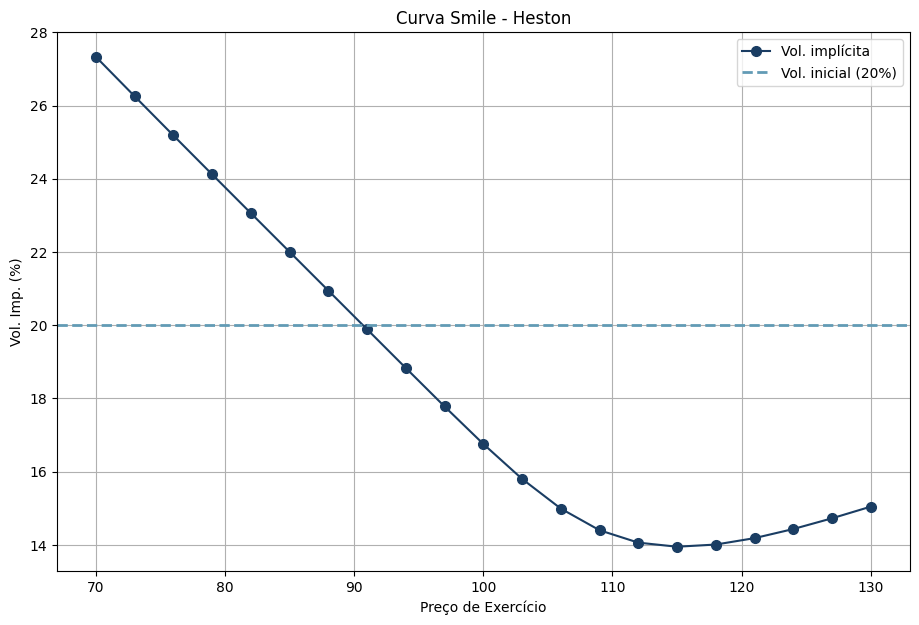

In [2]:
# --- Parâmetros ---
S0, tau, r, v0 = 100, 1, 0.05, 0.04
heston_params = {'kappa': 2, 'v_bar': 0.04, 'gamma': 0.9, 'rho': -0.5}
strikes = np.arange(70, 131, 3)
sigma_inicial = np.sqrt(v0)
vol_imp_list = []

for k in strikes:
    price = hp.heston_call_price(S0, k, v0, r, tau, **heston_params)
    vol = bs.vol_imp(price, S0, k, tau, r, sigma_inicial)
    vol_imp_list.append(vol)

plt.figure(figsize=(11, 7))
plt.plot(strikes, np.array(vol_imp_list) * 100, 'o-', 
         label='Vol. implícita', 
         color='#1A3D63',              
         markersize=7,     
         markeredgecolor='#1A3D63')

plt.axhline(np.sqrt(v0) * 100, color='#629BB5', linestyle='--', 
            linewidth=2, 
            label=f'Vol. inicial ({np.sqrt(v0):.0%})')

plt.title('Curva Smile - Heston')
plt.xlabel('Preço de Exercício')
plt.ylabel('Vol. Imp. (%)')
plt.grid(True)
plt.legend()

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'smile_heston.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

## Estudo de parâmetros

In [3]:
# Parâmetros base
S0, tau, r, v0 = 100, 2, 0.05, 0.04
heston_base = {'kappa': 0.1, 'v_bar': 0.1, 'gamma': 0.1, 'rho': -0.75}

# Grade de strikes
strikes = np.arange(40, 201, 7)

### Correlação $\rho$

Controla a inclinação, o "skew" do smile

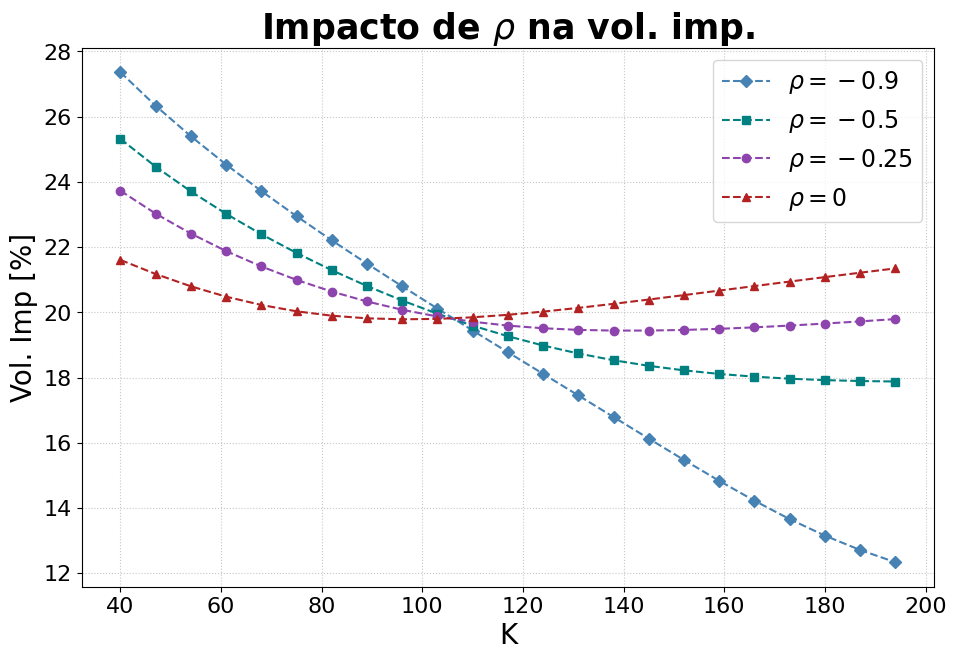

In [4]:
rho_list = [-0.9, -0.5, -0.25, 0]

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222' ]
markers = ['D', 's', 'o', '^']

for i, rho in enumerate(rho_list):
    params = heston_base.copy()
    params['rho'] = rho
    vols = hs.heston_smile(S0, tau, r, v0, params, strikes) * 100
    ax.plot(strikes, vols, color=colors[i], label=rf'$\rho = {rho}$', linestyle='--', marker=markers[i])

ax.set_title('Impacto de $\\rho$ na vol. imp.', fontsize=25, fontweight='bold')
ax.set_xlabel('K', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'estudo_rho.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

### Vol. da vol. $\gamma$

Controla a curvatura, a "convexidade" do smile

c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  sigma_imp = sigma_inicial - g/vega
c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:17: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))
c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:40: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))
c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\heston_pricing.py:87: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interva

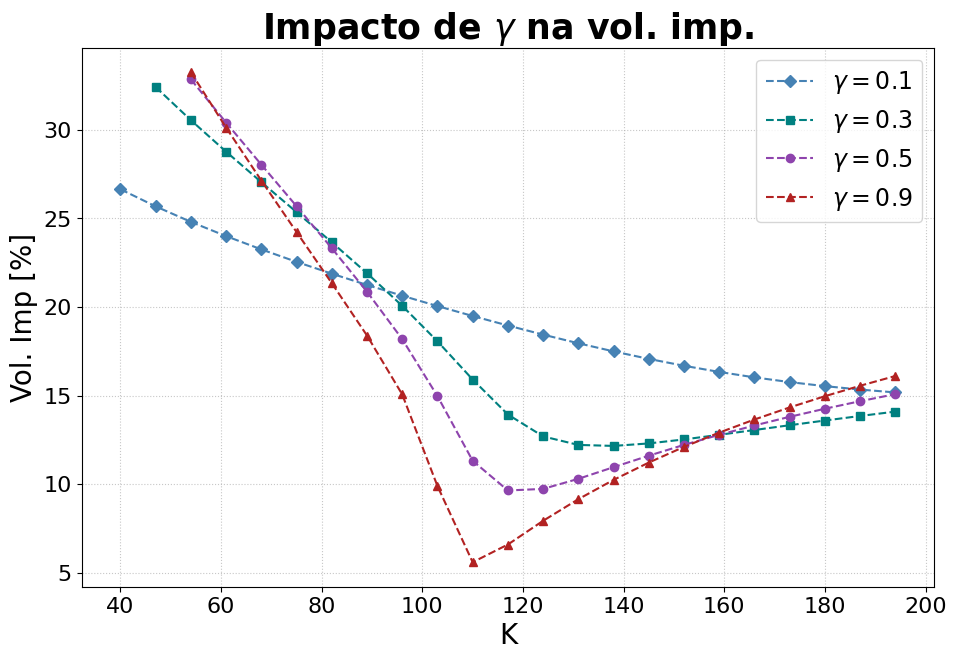

In [5]:
gamma_list = [0.1, 0.3, 0.5, 0.9]

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222']
markers = ['D', 's', 'o', '^']

for i, gamma in enumerate(gamma_list):
    params = heston_base.copy()
    params['gamma'] = gamma
    vols = hs.heston_smile(S0, tau, r, v0, params, strikes) * 100
    ax.plot(strikes, vols, 
            color=colors[i], label=rf'$\gamma = {gamma}$', linestyle='--', marker=markers[i])

ax.set_title('Impacto de $\\gamma$ na vol. imp.', fontsize=25, fontweight='bold')
ax.set_xlabel('K', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'estudo_gamma.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

### Reversão à média $\kappa$

Controla quanto tempo a volatilidade consegue "passear" longe da média

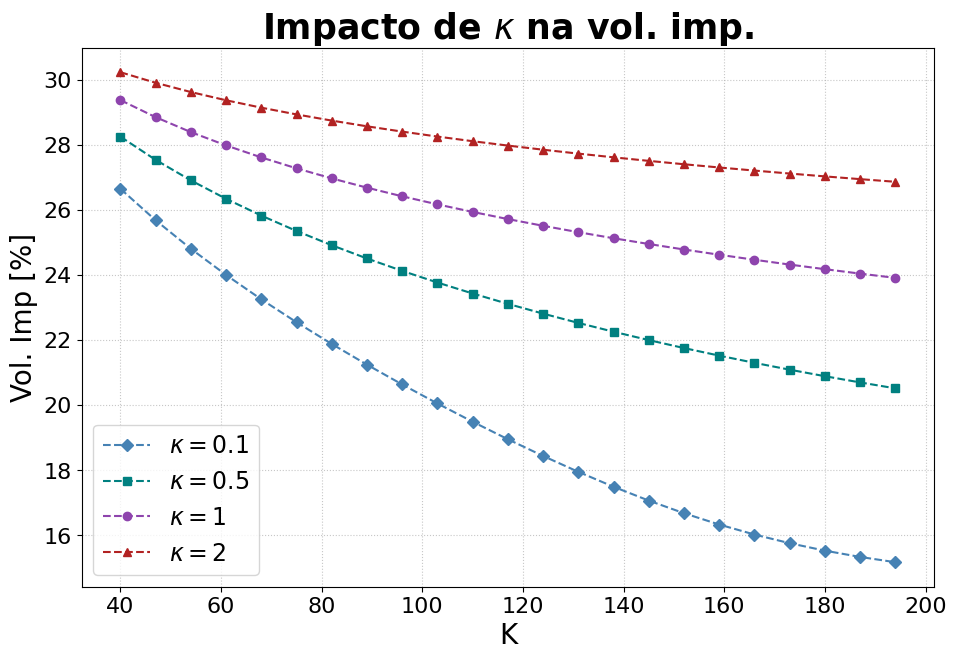

In [6]:
kappa_list = [0.1, 0.5, 1, 2]

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222']
markers = ['D', 's', 'o', '^']

for i, kappa in enumerate(kappa_list):
    params = heston_base.copy()
    params['kappa'] = kappa
    vols = hs.heston_smile(S0, tau, r, v0, params, strikes) * 100
    ax.plot(strikes, vols, 
            color=colors[i], label=rf'$\kappa = {kappa}$', linestyle='--', marker=markers[i])

ax.set_title('Impacto de $\\kappa$ na vol. imp.', fontsize=25, fontweight='bold')
ax.set_xlabel('K', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'estudo_kappa.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

Agora, além da grande strikes, vamos criar também uma grade de vencimentos para uma opção ATM

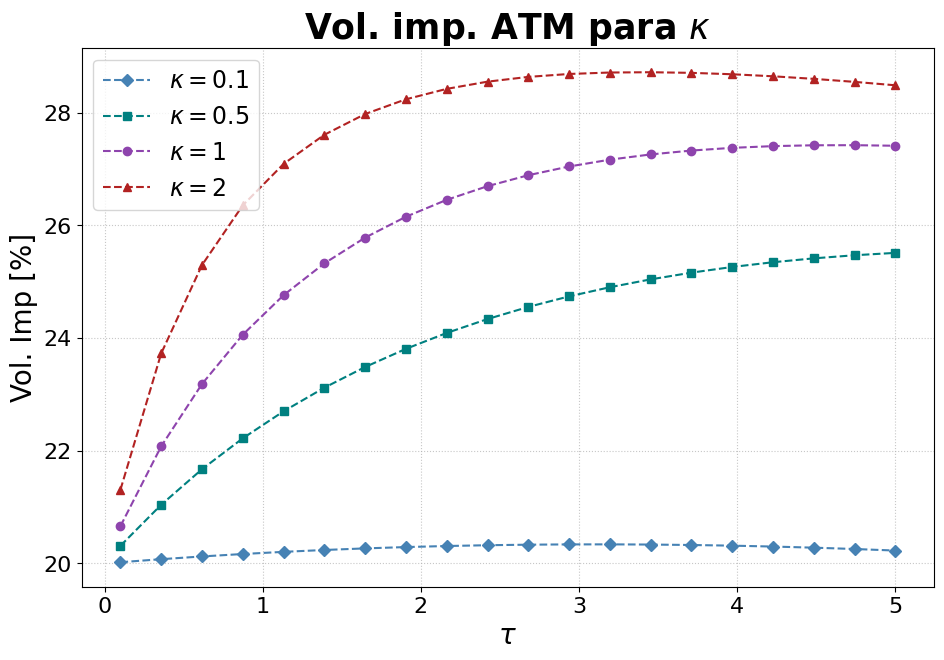

In [7]:
K_atm = 100
kappa_list = [0.1, 0.5, 1, 2]
taus = np.linspace(0.1, 5, 20)

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222']
markers = ['D', 's', 'o', '^']

for i, kappa in enumerate(kappa_list):
    params = heston_base.copy()
    params['kappa'] = kappa
    
    vols_list = []
    for t in taus:
        vol = hs.heston_smile(S0, t, r, v0, params, np.array([K_atm])) * 100
        vols_list.append(vol[0])

    ax.plot(taus, vols_list, 
            color=colors[i], label=rf'$\kappa = {kappa}$', linestyle='--', marker=markers[i])
    

ax.set_title('Vol. imp. ATM para $\\kappa$', fontsize=25, fontweight='bold')
ax.set_xlabel('$\\tau$', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'kappa_ATM.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

### Média a longo prazo $\bar{v}$


c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  sigma_imp = sigma_inicial - g/vega
c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:17: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))
c:\Pedro\Python\Dissertação\Códigos\Códigos GitHub\BS_equations.py:40: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * tau)/(sigma * np.sqrt(tau))


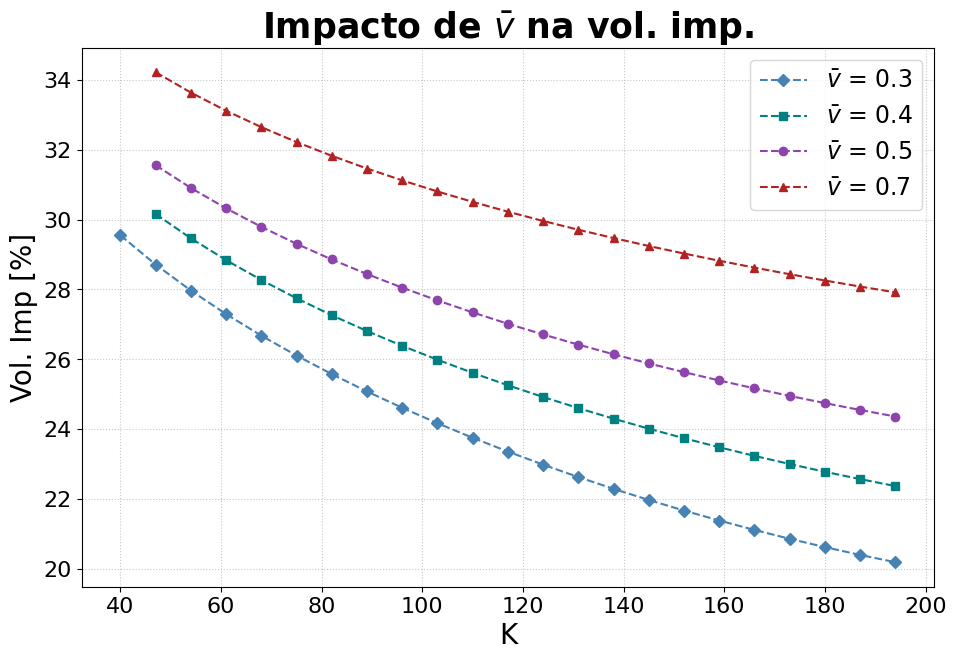

In [8]:
v_bar_list = [0.3, 0.4, 0.5, 0.7]

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222']
markers = ['D', 's', 'o', '^']
symbol = r'$\bar{v}$'

for i, v in enumerate(v_bar_list):
    params = heston_base.copy()
    params['v_bar'] = v
    vols = hs.heston_smile(S0, tau, r, v0, params, strikes) * 100
    ax.plot(strikes, vols, 
            color=colors[i], label=rf'{symbol} = {v}', linestyle='--', marker=markers[i])

ax.set_title('Impacto de $\\bar{v}$ na vol. imp.', fontsize=25, fontweight='bold')
ax.set_xlabel('K', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'estudo_v_bar.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()

### Variância inicial $v_0$

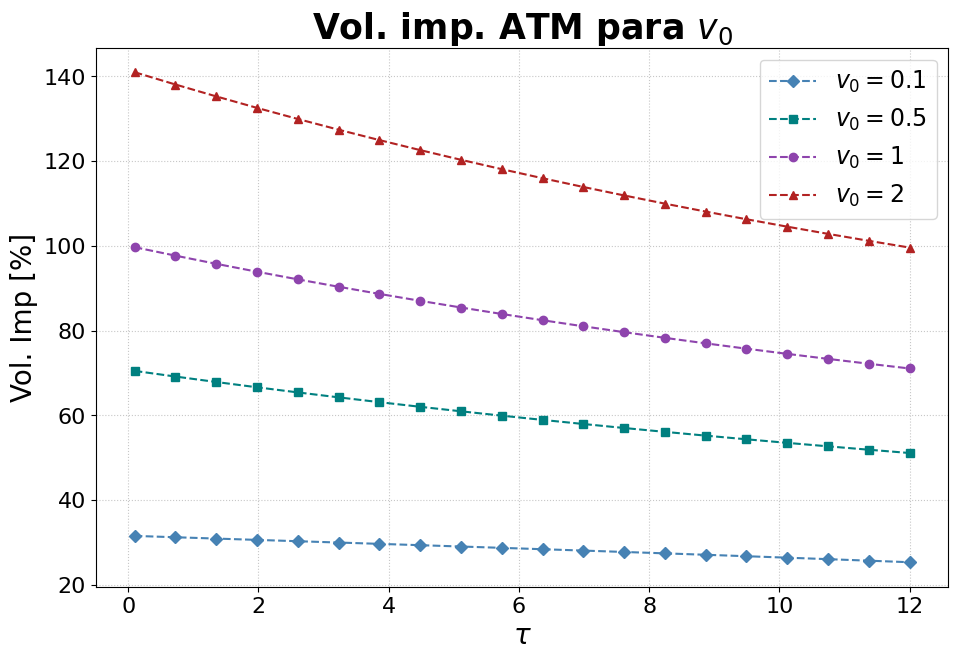

In [9]:
K_atm = 100
v0_list = [0.1, 0.5, 1, 2]
taus = np.linspace(0.1, 12, 20)

fig, ax = plt.subplots(figsize=(11, 7))
colors = ['#4682B4','#008080', '#8E44AD', '#B22222']
markers = ['D', 's', 'o', '^']

for i, v in enumerate(v0_list):
    params = heston_base.copy()
    v0 = v
    
    vols_list = []
    for t in taus:
        vol = hs.heston_smile(S0, t, r, v, params, np.array([K_atm])) * 100
        vols_list.append(vol[0])

    ax.plot(taus, vols_list, 
            color=colors[i], label=rf'$v_0 = {v}$', linestyle='--', marker=markers[i])
    

ax.set_title('Vol. imp. ATM para $v_0$',fontsize=25, fontweight='bold')
ax.set_xlabel('$\\tau$', fontsize=20)
ax.set_ylabel('Vol. Imp [%]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(fontsize='17')

output_dir = 'Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

caminho = os.path.join(output_dir, 'v0_ATM.pdf')
plt.savefig(caminho, dpi=300, bbox_inches='tight')

plt.show()